# 1. Introduction

# 2. Problem Statement

Arrest Flag

# 3. Objectives

# 4. Data Understanding

### Imports & Data Loading

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score



In [126]:
import pandas as pd

df = pd.read_csv('Terry_Stops_20240819.csv')
df.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,1 - 17,-1,20150000002502,47107,Offense Report,None,6358,1970,M,White,...,23:52:00.0000000,-,-,-,WEST PCT 3RD W - MARY - PLATOON 1,N,N,-,-,-
1,36 - 45,32643034540,20220000318696,38698204851,Arrest,-,7560,1986,M,White,...,12:24:59.0000000,ORDER - CRITICAL VIOLATION OF DV COURT ORDER,--DV - ENFORCE COURT ORDER (ARREST MANDATED),"TELEPHONE OTHER, NOT 911",SOUTH PCT 1ST W - R/S RELIEF,Y,N,South,S,S1
2,18 - 25,-1,20180000003995,497654,Field Contact,None,7428,1963,M,Hispanic or Latino,...,16:18:00.0000000,-,-,-,WEST PCT OPS - CPT,N,N,-,-,-
3,46 - 55,-1,20150000299600,109376,Field Contact,None,6805,1973,M,White,...,15:53:00.0000000,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,--DISTURBANCE - OTHER,ONVIEW,WEST PCT 2ND W - DAVID - PLATOON 1,N,N,West,D,D3
4,26 - 35,-1,20160000438879,219794,Offense Report,None,5781,1963,M,Black or African American,...,15:51:00.0000000,THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),--THEFT - SHOPLIFT,ONVIEW,SOUTHWEST PCT 2ND WATCH - F/W RELIEF,N,N,Southwest,W,W2


### Exploratory Data Analysis (EDA) & Feature Engineering

In [127]:
df.shape

(60962, 23)

In [128]:
df.describe()

,Subject ID,GO / SC Num,Terry Stop ID,Officer YOB
count,6.096200e+04,6.096200e+04,6.096200e+04,60962.000000
mean,7.246509e+09,2.018660e+13,1.213135e+10,1984.077474
std,1.265918e+10,8.575239e+10,1.749055e+10,9.472551
min,-8.000000e+00,-1.000000e+00,2.802000e+04,1900.000000
25%,-1.000000e+00,2.017000e+13,2.387742e+05,1979.000000
50%,-1.000000e+00,2.018000e+13,5.086870e+05,1986.000000
75%,7.752270e+09,2.021000e+13,1.953036e+10,1991.000000
max,5.845336e+10,2.024000e+13,5.845333e+10,2002.000000


Our data has 23 columns and 609562 rows

In [129]:
df.columns

Index(['Subject Age Group', 'Subject ID', 'GO / SC Num', 'Terry Stop ID',
       'Stop Resolution', 'Weapon Type', 'Officer ID', 'Officer YOB',
       'Officer Gender', 'Officer Race', 'Subject Perceived Race',
       'Subject Perceived Gender', 'Reported Date', 'Reported Time',
       'Initial Call Type', 'Final Call Type', 'Call Type', 'Officer Squad',
       'Arrest Flag', 'Frisk Flag', 'Precinct', 'Sector', 'Beat'],
      dtype='object')

These are the columns in our data and their descriptions based on a review of our data and information from our data source: (https://data.seattle.gov/Public-Safety/Terry-Stops/28ny-9ts8/about_data):

1. Subject Age Group - Subject Age Group (10 year increments) as reported by the officer (Text)

2. Subject ID - Key, generated daily, identifying unique subjects in the dataset using a character to character match of first name and last         name. "Null" values indicate an "anonymous" or "unidentified" subject. Subjects of a Terry Stop are not required to present identification. (Text)

3. GO / SC Num - General Offense or Street Check number, relating the Terry Stop to the parent report. This field may have a one to many relationship in the data. (Text)

4. Terry Stop ID - 	Key identifying unique Terry Stop reports. (Text)

5. Stop Resolution - Resolution of the stop as reported by the officer. (Text)

6. Weapon Type - Type of weapon, if any, identified during a search or frisk of the subject. Indicates "None" if no weapons was found. (Text)

7. Officer ID  - Key identifying unique officers in the dataset. (Text)

8. Officer YOB - Year of birth, as reported by the officer. (Text)

9. Officer Gender - Gender of the officer, as reported by the officer. (Text)

10. Officer Race - Race of the officer, as reported by the officer. (Text)

11. Subject Perceived Race - Perceived race of the subject, as reported by the officer. (Text)

12. Subject Perceived Gender - Perceived gender of the subject, as reported by the officer. (Text)

13. Reported Date - Date the report was filed in the Records Management System (RMS). Not necessarily the date the stop occurred but generally within 1 day. (Floating Timestamp)

14. Reported Time - Time the stop was reported in the Records Management System (RMS). Not the time the stop occurred but generally within 10 hours. (Text)

15. Initial Call Type - Initial classification of the call as assigned by 911. (Text)

16. Final Call Type - Final classification of the call as assigned by the primary officer closing the event. (Text)

17. Call Type - How the call was received by the communication center. (Text)

18. Officer Squad - Functional squad assignment (not budget) of the officer as reported by the Data Analytics Platform (DAP). (Text)

19. Arrest Flag - Indicator of whether a "physical arrest" was made, of the subject, during the Terry Stop. Does not necessarily reflect a report of an arrest in the Records Management System (RMS). (Text)

20. Frisk Flag - Indicator of whether a "frisk" was conducted, by the officer, of the subject, during the Terry Stop. (Text)

21. Precint - Precinct of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred. (Text)

22. Sector - Sector of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred. (Text)

23. Beat - Beat of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred. (Text)


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60962 entries, 0 to 60961
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         60962 non-null  object
 1   Subject ID                60962 non-null  int64 
 2   GO / SC Num               60962 non-null  int64 
 3   Terry Stop ID             60962 non-null  int64 
 4   Stop Resolution           60962 non-null  object
 5   Weapon Type               60962 non-null  object
 6   Officer ID                60962 non-null  object
 7   Officer YOB               60962 non-null  int64 
 8   Officer Gender            60962 non-null  object
 9   Officer Race              60962 non-null  object
 10  Subject Perceived Race    60962 non-null  object
 11  Subject Perceived Gender  60962 non-null  object
 12  Reported Date             60962 non-null  object
 13  Reported Time             60962 non-null  object
 14  Initial Call Type     

In [131]:
df.isna().sum()

Subject Age Group             0
Subject ID                    0
GO / SC Num                   0
Terry Stop ID                 0
Stop Resolution               0
Weapon Type                   0
Officer ID                    0
Officer YOB                   0
Officer Gender                0
Officer Race                  0
Subject Perceived Race        0
Subject Perceived Gender      0
Reported Date                 0
Reported Time                 0
Initial Call Type             0
Final Call Type               0
Call Type                     0
Officer Squad               561
Arrest Flag                   0
Frisk Flag                    0
Precinct                      0
Sector                        0
Beat                          0
dtype: int64

We have missing data in the Officer Squad column. We will impute this column with a placeholder 'Unknown' Value

In [132]:
df_imputed = df.fillna('Unknown')
df_imputed.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,1 - 17,-1,20150000002502,47107,Offense Report,None,6358,1970,M,White,...,23:52:00.0000000,-,-,-,WEST PCT 3RD W - MARY - PLATOON 1,N,N,-,-,-
1,36 - 45,32643034540,20220000318696,38698204851,Arrest,-,7560,1986,M,White,...,12:24:59.0000000,ORDER - CRITICAL VIOLATION OF DV COURT ORDER,--DV - ENFORCE COURT ORDER (ARREST MANDATED),"TELEPHONE OTHER, NOT 911",SOUTH PCT 1ST W - R/S RELIEF,Y,N,South,S,S1
2,18 - 25,-1,20180000003995,497654,Field Contact,None,7428,1963,M,Hispanic or Latino,...,16:18:00.0000000,-,-,-,WEST PCT OPS - CPT,N,N,-,-,-
3,46 - 55,-1,20150000299600,109376,Field Contact,None,6805,1973,M,White,...,15:53:00.0000000,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,--DISTURBANCE - OTHER,ONVIEW,WEST PCT 2ND W - DAVID - PLATOON 1,N,N,West,D,D3
4,26 - 35,-1,20160000438879,219794,Offense Report,None,5781,1963,M,Black or African American,...,15:51:00.0000000,THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),--THEFT - SHOPLIFT,ONVIEW,SOUTHWEST PCT 2ND WATCH - F/W RELIEF,N,N,Southwest,W,W2


In [242]:
df_imputed.duplicated().sum()

0

We also seem to have rows filled with '-'. We will treat these as missing values. 
First we need to convert these to NaN	

In [133]:
for column in df_imputed.columns:
    df_imputed[column] = df_imputed[column].replace('-', np.nan)

In [134]:
df_imputed.isna().sum()

Subject Age Group            2200
Subject ID                      0
GO / SC Num                     0
Terry Stop ID                   0
Stop Resolution                 0
Weapon Type                 24528
Officer ID                     24
Officer YOB                     0
Officer Gender                  0
Officer Race                    0
Subject Perceived Race       1816
Subject Perceived Gender      243
Reported Date                   0
Reported Time                   0
Initial Call Type           13473
Final Call Type             13473
Call Type                   13473
Officer Squad                   0
Arrest Flag                     0
Frisk Flag                    478
Precinct                    10617
Sector                      10768
Beat                        10762
dtype: int64

After deeper analysis of our data, we have several more columns with missing data.

We will handle these columns separately to preserve the quality of our data.

1. Subject Age Group  - we can impute this with mode to preserve the shape of our data.

2. Weapon Type - Given that a large portion is missing, it’s possible that in many cases, no weapon was found. Imputing missing values with "None" might be logical.

3. Officer ID - Since only 24 out of 60,962 entries are affected, we will drop these rows.

4. Subject Perceived Race - Replacing missing values with "Unknown" maintains the data structure without introducing bias.

5. Subject Perceived Gender - Replacing missing values with "Unknown" maintains the data structure without introducing bias.

6. Initial Call Type, Final Call Type, Call Type - Missing call types might suggest a lack of information or a specific condition (e.g., not applicable since no call was made and the incident just transpired). Imputing with "Unknown" preserves this possibility.

7. Frisk Flag - Since the missing values are minimal, using the most frequent value could be effective.

8. Precint, Sector, Beat - Geographic information might be missing due to unreported locations. Filling with "Unknown" allows us to retain these rows.


In [135]:
columns_to_fill_with_mode = ['Subject Age Group', 'Frisk Flag']
columns_to_fill_with_unkown = ['Subject Perceived Race', 'Subject Perceived Gender', 'Initial Call Type'
, 'Final Call Type', 'Call Type', 'Precinct', 'Sector', 'Beat']
columns_to_fill_with_none = ['Weapon Type']
columns_to_drop = ['Officer ID']

for column in columns_to_fill_with_mode:
    df_imputed[column] = df_imputed[column].fillna(df_imputed[column].mode()[0])

for column in columns_to_fill_with_unkown:
    df_imputed[column] = df_imputed[column].fillna('Unknown')

for column in columns_to_fill_with_none:
    df_imputed[column] = df_imputed[column].fillna('None')

for column in columns_to_drop:
    df_imputed.dropna(inplace=True)

In [136]:
df_imputed.isna().sum()

Subject Age Group           0
Subject ID                  0
GO / SC Num                 0
Terry Stop ID               0
Stop Resolution             0
Weapon Type                 0
Officer ID                  0
Officer YOB                 0
Officer Gender              0
Officer Race                0
Subject Perceived Race      0
Subject Perceived Gender    0
Reported Date               0
Reported Time               0
Initial Call Type           0
Final Call Type             0
Call Type                   0
Officer Squad               0
Arrest Flag                 0
Frisk Flag                  0
Precinct                    0
Sector                      0
Beat                        0
dtype: int64

Our dataset no longer contains missing values.

#### Columns to drop:

Next, we will drop some columns that do not provide useful information for our analysis. From a review of the column descriptions, we can ignore the following columns:

1. Subject ID: This is a unique identifier for each subject, not useful for modeling.

2. GO / SC Num: Unique identifier for reports, irrelevant for prediction.

3. Terry Stop ID: Another unique identifier.

4. Officer ID: Identifies each officer; may introduce bias and is not necessary.

5. Reported Date & Reported Time: Since they represent when the report was filed, not when the stop occurred, they may not be useful.


We can use Officer YOB - Officer Year of Birth to extract and Age and put it this age into bins similar to our Subject Age Group by subtracting their year of birth from the year of the stop. 

In [137]:
bins = df_imputed['Subject Age Group'].unique()
bins

array(['1 - 17', '36 - 45', '18 - 25', '46 - 55', '26 - 35',
       '56 and Above'], dtype=object)

In [138]:

# Calculate Officer Age and add this to a new column
report_year = df_imputed['Reported Date'].str[:4].astype(int)
df_imputed['Officer Age'] = report_year - df_imputed['Officer YOB']
df_imputed.head()


,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat,Officer Age
0,1 - 17,-1,20150000002502,47107,Offense Report,None,6358,1970,M,White,...,Unknown,Unknown,Unknown,WEST PCT 3RD W - MARY - PLATOON 1,N,N,Unknown,Unknown,Unknown,45
1,36 - 45,32643034540,20220000318696,38698204851,Arrest,None,7560,1986,M,White,...,ORDER - CRITICAL VIOLATION OF DV COURT ORDER,--DV - ENFORCE COURT ORDER (ARREST MANDATED),"TELEPHONE OTHER, NOT 911",SOUTH PCT 1ST W - R/S RELIEF,Y,N,South,S,S1,36
2,18 - 25,-1,20180000003995,497654,Field Contact,None,7428,1963,M,Hispanic or Latino,...,Unknown,Unknown,Unknown,WEST PCT OPS - CPT,N,N,Unknown,Unknown,Unknown,55
3,46 - 55,-1,20150000299600,109376,Field Contact,None,6805,1973,M,White,...,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,--DISTURBANCE - OTHER,ONVIEW,WEST PCT 2ND W - DAVID - PLATOON 1,N,N,West,D,D3,42
4,26 - 35,-1,20160000438879,219794,Offense Report,None,5781,1963,M,Black or African American,...,THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),--THEFT - SHOPLIFT,ONVIEW,SOUTHWEST PCT 2ND WATCH - F/W RELIEF,N,N,Southwest,W,W2,53


In [139]:
df_imputed['Officer Age'].describe()

count    60938.000000
mean        34.590666
std          8.793464
min         21.000000
25%         28.000000
50%         33.000000
75%         39.000000
max        121.000000
Name: Officer Age, dtype: float64

It's unlikely we have on duty officers above the age of 65 so we can drop rows with officers above this age

In [140]:
df_imputed = df_imputed[df_imputed['Officer Age'] <= 65]

df_imputed.head()


,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat,Officer Age
0,1 - 17,-1,20150000002502,47107,Offense Report,None,6358,1970,M,White,...,Unknown,Unknown,Unknown,WEST PCT 3RD W - MARY - PLATOON 1,N,N,Unknown,Unknown,Unknown,45
1,36 - 45,32643034540,20220000318696,38698204851,Arrest,None,7560,1986,M,White,...,ORDER - CRITICAL VIOLATION OF DV COURT ORDER,--DV - ENFORCE COURT ORDER (ARREST MANDATED),"TELEPHONE OTHER, NOT 911",SOUTH PCT 1ST W - R/S RELIEF,Y,N,South,S,S1,36
2,18 - 25,-1,20180000003995,497654,Field Contact,None,7428,1963,M,Hispanic or Latino,...,Unknown,Unknown,Unknown,WEST PCT OPS - CPT,N,N,Unknown,Unknown,Unknown,55
3,46 - 55,-1,20150000299600,109376,Field Contact,None,6805,1973,M,White,...,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,--DISTURBANCE - OTHER,ONVIEW,WEST PCT 2ND W - DAVID - PLATOON 1,N,N,West,D,D3,42
4,26 - 35,-1,20160000438879,219794,Offense Report,None,5781,1963,M,Black or African American,...,THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),--THEFT - SHOPLIFT,ONVIEW,SOUTHWEST PCT 2ND WATCH - F/W RELIEF,N,N,Southwest,W,W2,53


In [141]:
df_imputed['Officer Age'].describe()

count    60835.000000
mean        34.469467
std          8.238621
min         21.000000
25%         28.000000
50%         33.000000
75%         39.000000
max         65.000000
Name: Officer Age, dtype: float64

In [142]:
# Initialize bin_edges list and handle bins
bin_edges = []
for bin in bins:
    if bin == '56 and Above':
        bin_edges.append(56)  # Set the lower bound for the last bin to 56
    else:
        lower_bound = int(bin.split(' - ')[0])
        bin_edges.append(lower_bound)
        

# Add the upper bound from the last bin 
max_age = df_imputed['Officer Age'].max()  
bin_edges.append(max_age)

# Remove duplicates and sort bin_edges
bin_edges = sorted(set(bin_edges))  

bin_edges

[1, 18, 26, 36, 46, 56, 65]

In [143]:
labels = df_imputed['Subject Age Group'].unique().tolist()
labels

['1 - 17', '36 - 45', '18 - 25', '46 - 55', '26 - 35', '56 and Above']

In [144]:
print('length of bin_dedges: ', len(bin_edges)-1)
print('length of labels: ', len(labels))

length of bin_dedges:  6
length of labels:  6


In [145]:
labels = df_imputed['Subject Age Group'].unique().tolist()
if len(bin_edges) - 1 != len(labels):
    raise ValueError("The number of labels does not match the number of bins")

In [146]:
# Apply pd.cut() to create the bins for Officer Age
df_imputed['Officer Age Group'] = pd.cut(df_imputed['Officer Age'], bins=bin_edges, labels=labels, right=True)

print('Officer Age Group:', bins)
print('Subject Age Group:', labels)
df_imputed.head()



Officer Age Group: ['1 - 17' '36 - 45' '18 - 25' '46 - 55' '26 - 35' '56 and Above']
Subject Age Group: ['1 - 17', '36 - 45', '18 - 25', '46 - 55', '26 - 35', '56 and Above']


,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat,Officer Age,Officer Age Group
0,1 - 17,-1,20150000002502,47107,Offense Report,None,6358,1970,M,White,...,Unknown,Unknown,WEST PCT 3RD W - MARY - PLATOON 1,N,N,Unknown,Unknown,Unknown,45,46 - 55
1,36 - 45,32643034540,20220000318696,38698204851,Arrest,None,7560,1986,M,White,...,--DV - ENFORCE COURT ORDER (ARREST MANDATED),"TELEPHONE OTHER, NOT 911",SOUTH PCT 1ST W - R/S RELIEF,Y,N,South,S,S1,36,18 - 25
2,18 - 25,-1,20180000003995,497654,Field Contact,None,7428,1963,M,Hispanic or Latino,...,Unknown,Unknown,WEST PCT OPS - CPT,N,N,Unknown,Unknown,Unknown,55,26 - 35
3,46 - 55,-1,20150000299600,109376,Field Contact,None,6805,1973,M,White,...,--DISTURBANCE - OTHER,ONVIEW,WEST PCT 2ND W - DAVID - PLATOON 1,N,N,West,D,D3,42,46 - 55
4,26 - 35,-1,20160000438879,219794,Offense Report,None,5781,1963,M,Black or African American,...,--THEFT - SHOPLIFT,ONVIEW,SOUTHWEST PCT 2ND WATCH - F/W RELIEF,N,N,Southwest,W,W2,53,26 - 35


In [147]:
#change the datatype so Officer Age Group and Subject Age Group to ordinal categorical values.
df_imputed['Officer Age Group'] = pd.Categorical(df_imputed['Officer Age Group'],
                                         categories=bins,
                                         ordered=True)
df_imputed['Subject Age Group'] = pd.Categorical(df_imputed['Subject Age Group'],
                                         categories=labels,
                                         ordered=True)

In [148]:
columns_to_drop = ['Subject ID', 'GO / SC Num', 'Terry Stop ID', 'Officer ID', 'Reported Date', 'Reported Time','Officer Age','Officer YOB']

df_preprocessed = df_imputed.drop(columns=columns_to_drop, axis =1)

df_preprocessed.head()

,Subject Age Group,Stop Resolution,Weapon Type,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat,Officer Age Group
0,1 - 17,Offense Report,None,M,White,Unknown,Female,Unknown,Unknown,Unknown,WEST PCT 3RD W - MARY - PLATOON 1,N,N,Unknown,Unknown,Unknown,46 - 55
1,36 - 45,Arrest,None,M,White,Unknown,Male,ORDER - CRITICAL VIOLATION OF DV COURT ORDER,--DV - ENFORCE COURT ORDER (ARREST MANDATED),"TELEPHONE OTHER, NOT 911",SOUTH PCT 1ST W - R/S RELIEF,Y,N,South,S,S1,18 - 25
2,18 - 25,Field Contact,None,M,Hispanic or Latino,White,Male,Unknown,Unknown,Unknown,WEST PCT OPS - CPT,N,N,Unknown,Unknown,Unknown,26 - 35
3,46 - 55,Field Contact,None,M,White,American Indian or Alaska Native,Female,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,--DISTURBANCE - OTHER,ONVIEW,WEST PCT 2ND W - DAVID - PLATOON 1,N,N,West,D,D3,46 - 55
4,26 - 35,Offense Report,None,M,Black or African American,White,Female,THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),--THEFT - SHOPLIFT,ONVIEW,SOUTHWEST PCT 2ND WATCH - F/W RELIEF,N,N,Southwest,W,W2,26 - 35


We have dropped 6 columns 'Subject ID', 'Officer YOB', 'GO / SC Num', 'Terry Stop ID', 'Officer ID', 'Reported Date',and 'Reported Time' from our original dataset and added one new column - Officer Age Group

Let us look at what our dataset looks like now

In [149]:
df_preprocessed.shape

(60835, 17)

In [243]:
df_preprocessed.duplicated().sum()

5967

Let's drop our duplicated rows

In [244]:
df_preprocessed.drop_duplicates(inplace = True)

In [245]:
print('Shape: ',df_preprocessed.shape)
print('Duplicates: ',df_preprocessed.duplicated().sum())

Shape:  (54868, 17)
Duplicates:  0


Our dataset now has 17 columns and 54,868 rows and no duplicates

In [246]:
df_preprocessed.columns

Index(['Subject Age Group', 'Stop Resolution', 'Weapon Type', 'Officer Gender',
       'Officer Race', 'Subject Perceived Race', 'Subject Perceived Gender',
       'Initial Call Type', 'Final Call Type', 'Call Type', 'Officer Squad',
       'Arrest Flag', 'Frisk Flag', 'Precinct', 'Sector', 'Beat',
       'Officer Age Group'],
      dtype='object')

In [247]:
df_preprocessed['Subject Age Group']

0              1 - 17
1             36 - 45
2             18 - 25
3             46 - 55
4             26 - 35
             ...     
60957    56 and Above
60958         18 - 25
60959         26 - 35
60960         36 - 45
60961         36 - 45
Name: Subject Age Group, Length: 54868, dtype: category
Categories (6, object): ['1 - 17' < '36 - 45' < '18 - 25' < '46 - 55' < '26 - 35' < '56 and Above']

In [248]:
df_preprocessed.describe()

,Subject Age Group,Stop Resolution,Weapon Type,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat,Officer Age Group
count,54868,54868,54868,54868,54868,54868,54868,54868,54868,54868,54868,54868,54868,54868,54868,54868,54868
unique,6,5,22,2,8,10,6,180,196,7,271,2,2,8,20,55,5
top,26 - 35,Field Contact,None,True,White,White,Male,Unknown,Unknown,911,TRAINING - FIELD TRAINING SQUAD,False,False,West,Unknown,Unknown,18 - 25
freq,20144,25055,51063,48582,38884,26448,43031,9769,9769,27519,5801,48364,40928,15917,7324,7318,29457


#### Types of Variables:

Next we will look at the types of variables in our dataset. 

We have three columns with binary data - officer gender, arrest flag and frisk flag. We will convert these data to booleans

In [153]:
binary_columns = ['Arrest Flag', 'Frisk Flag', 'Officer Gender']

for column in binary_columns:
    df_preprocessed[column] = df_preprocessed[column] == 'Y' if column in ['Arrest Flag', 'Frisk Flag'] else df_preprocessed[column] == 'M'

df_preprocessed[binary_columns].head()

,Arrest Flag,Frisk Flag,Officer Gender
0,False,False,True
1,True,False,True
2,False,False,True
3,False,False,True
4,False,False,True


The goal of our analysis is to predict whether an arrest was made during a Terry Stop. Therefore , our target will be "Arrest Flag".

In [264]:
X = df_preprocessed.drop('Arrest Flag', axis = 1)
y = df_preprocessed['Arrest Flag']

In [267]:
# Identify categorical and numerical features
categorical = [var for var in X.columns if X[var].dtype in ['O', 'category', 'bool']]
numerical = [var for var in X.columns if X[var].dtype not in ['O', 'category','bool']]

print('Summary of Features\n')
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)


Summary of Features

There are 0 numerical variables

The numerical variables are : []
There are 16 categorical variables

The categorical variables are : ['Subject Age Group', 'Stop Resolution', 'Weapon Type', 'Officer Gender', 'Officer Race', 'Subject Perceived Race', 'Subject Perceived Gender', 'Initial Call Type', 'Final Call Type', 'Call Type', 'Officer Squad', 'Frisk Flag', 'Precinct', 'Sector', 'Beat', 'Officer Age Group']


All our features are categorical variables. 

### Visualizing the distribution of our features

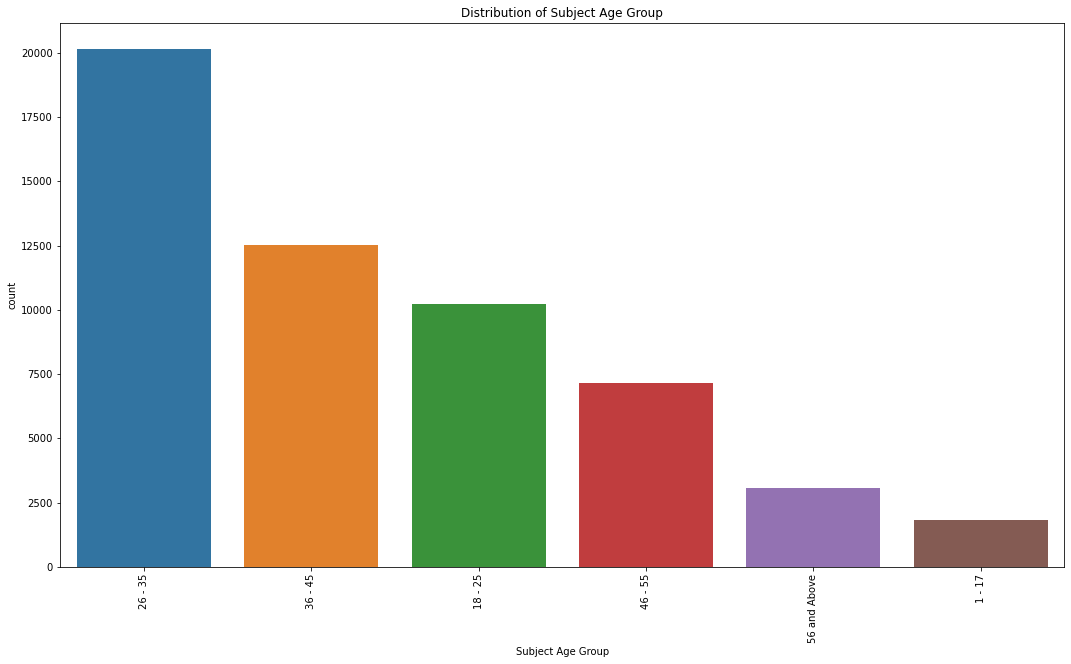

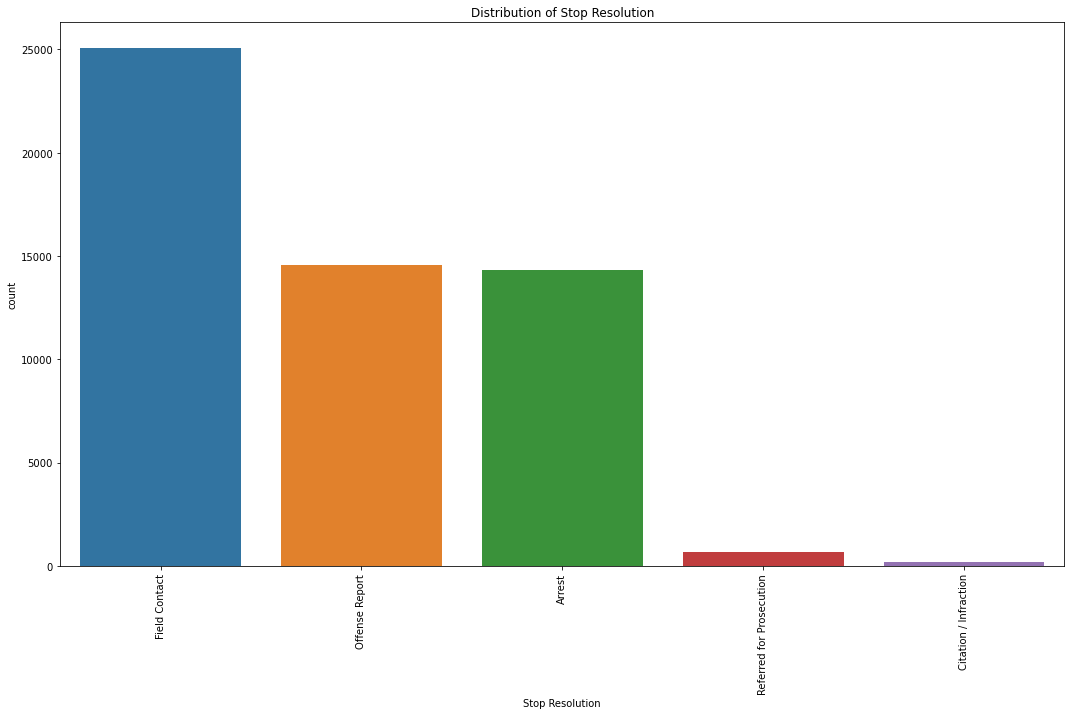

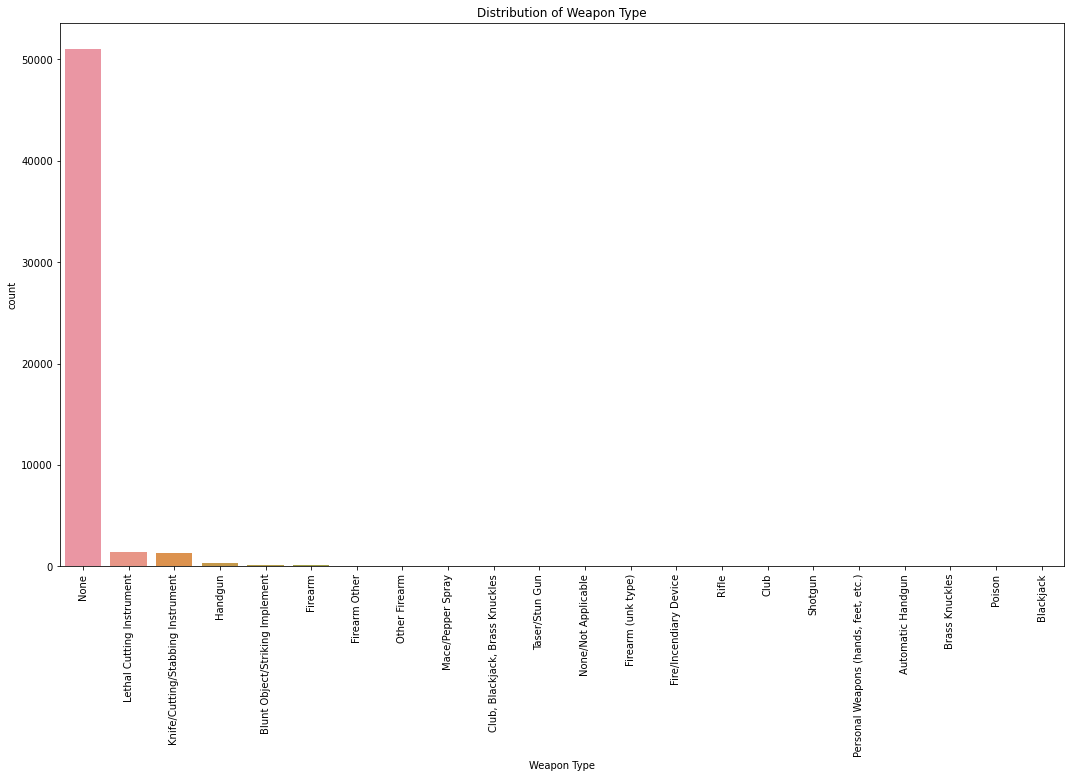

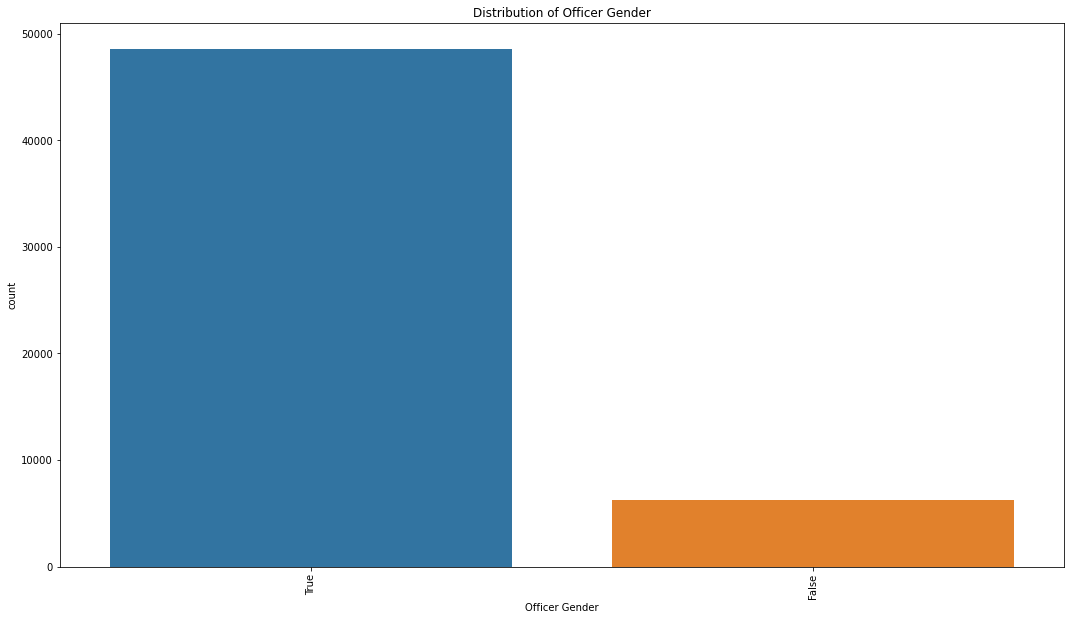

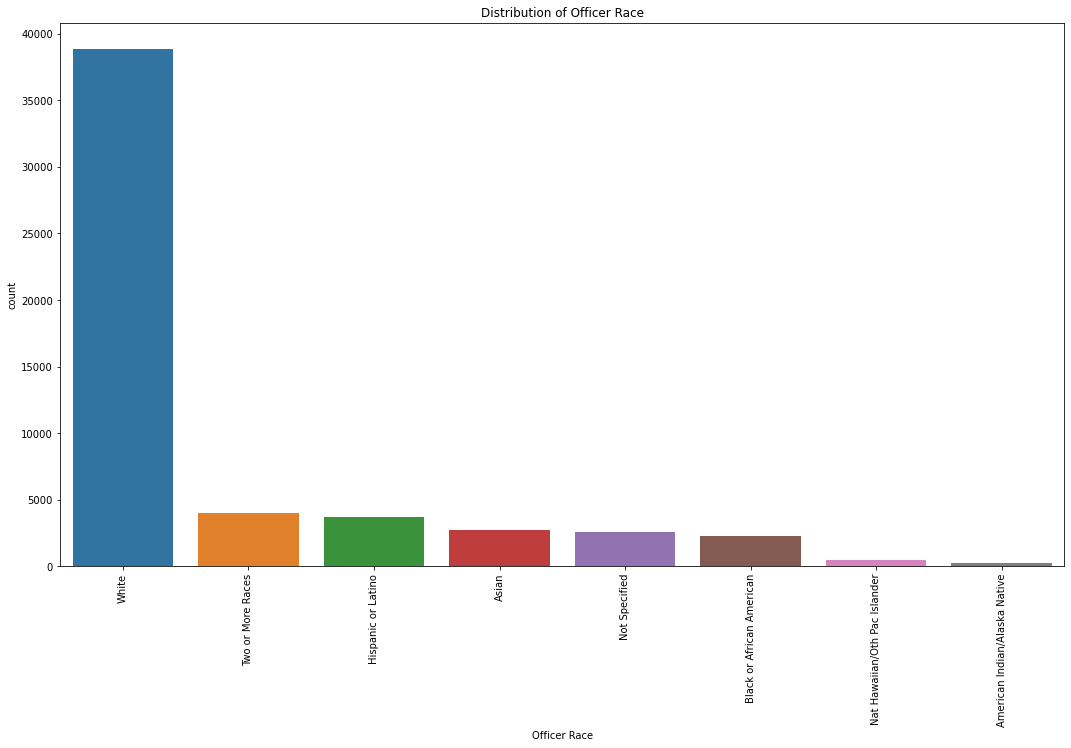

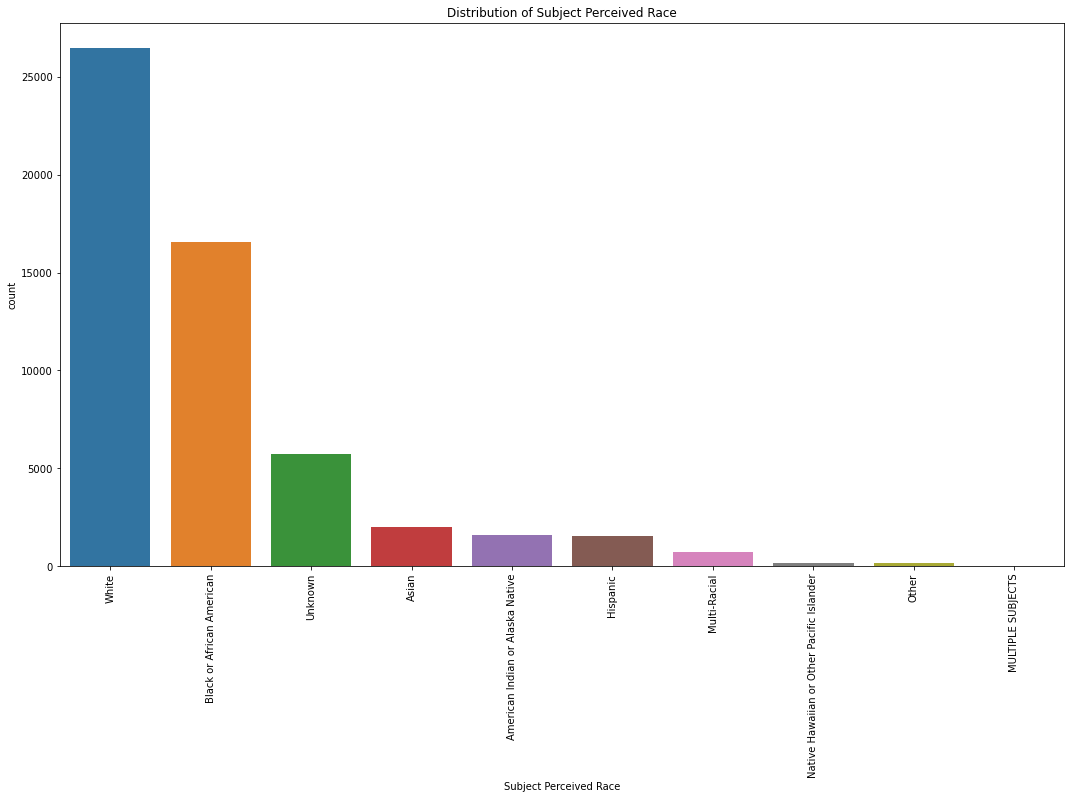

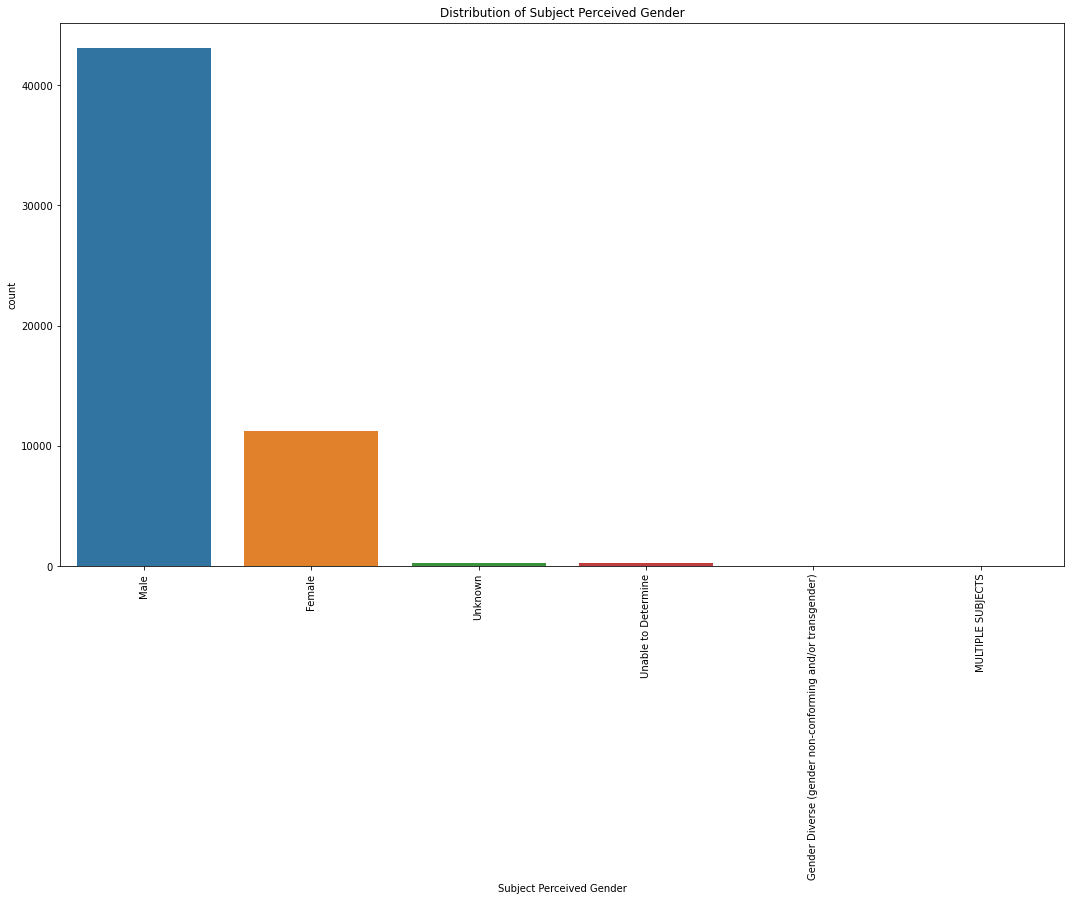

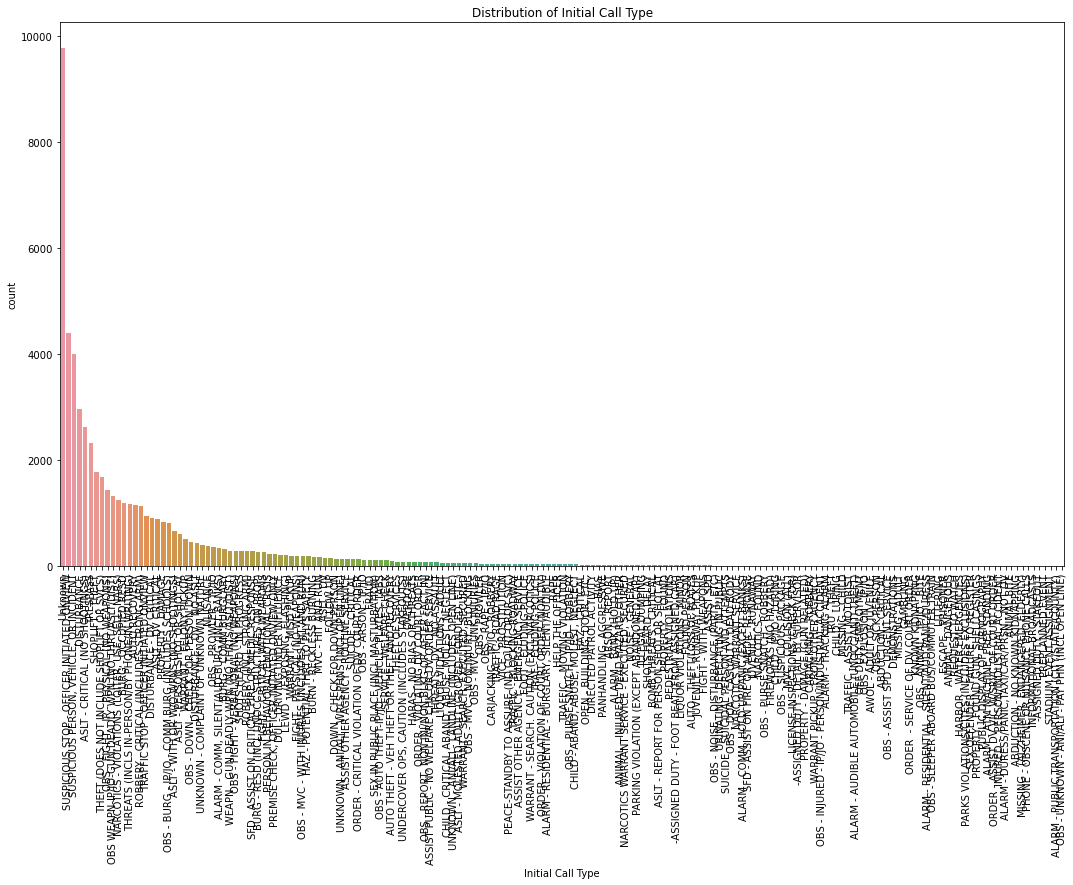

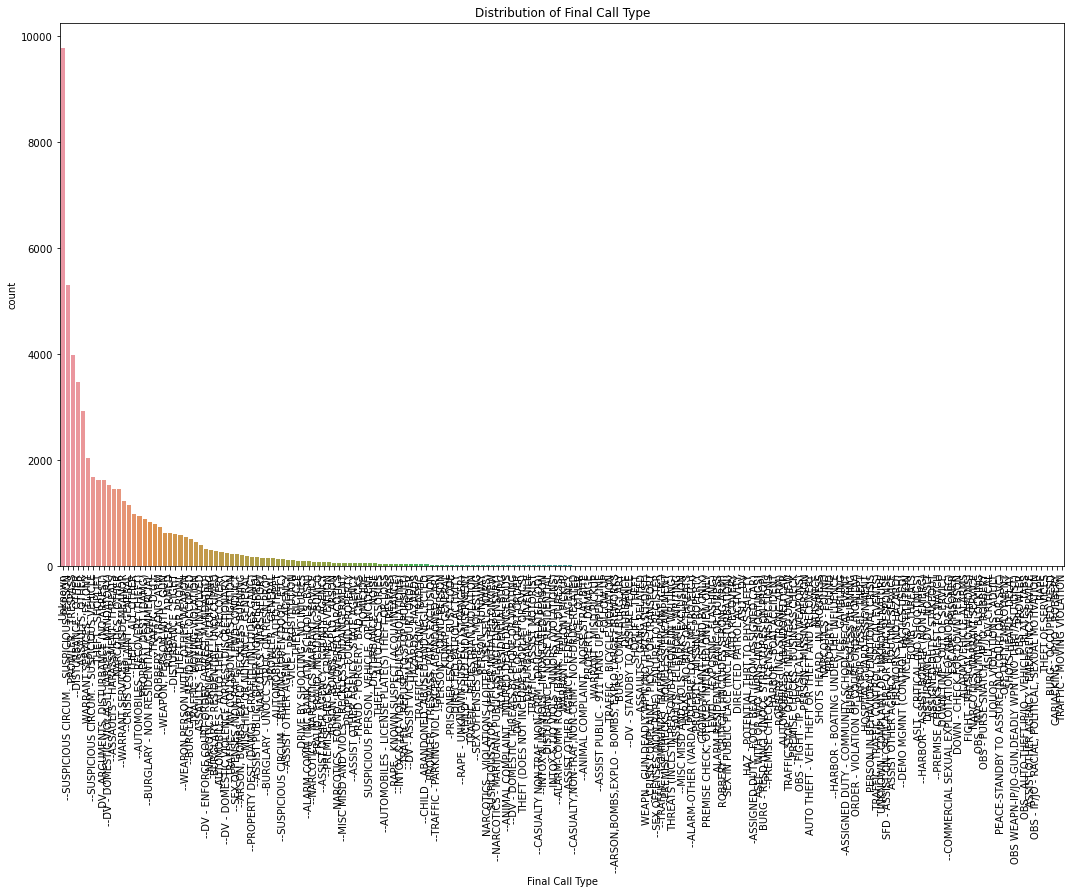

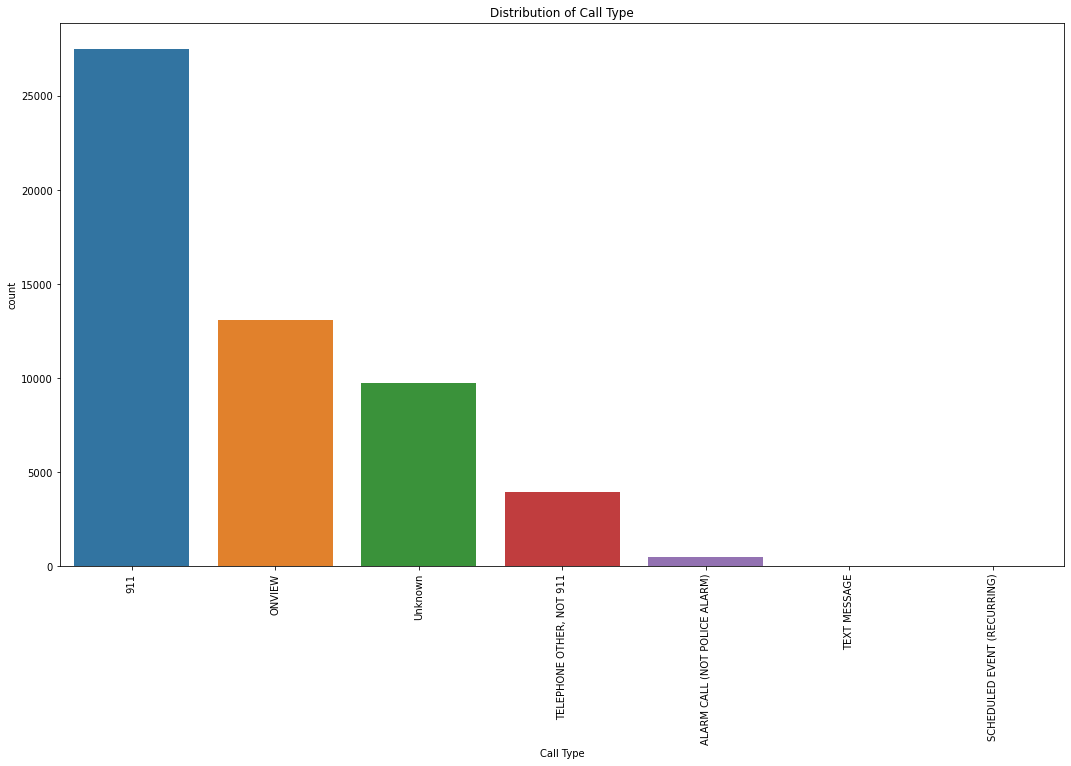

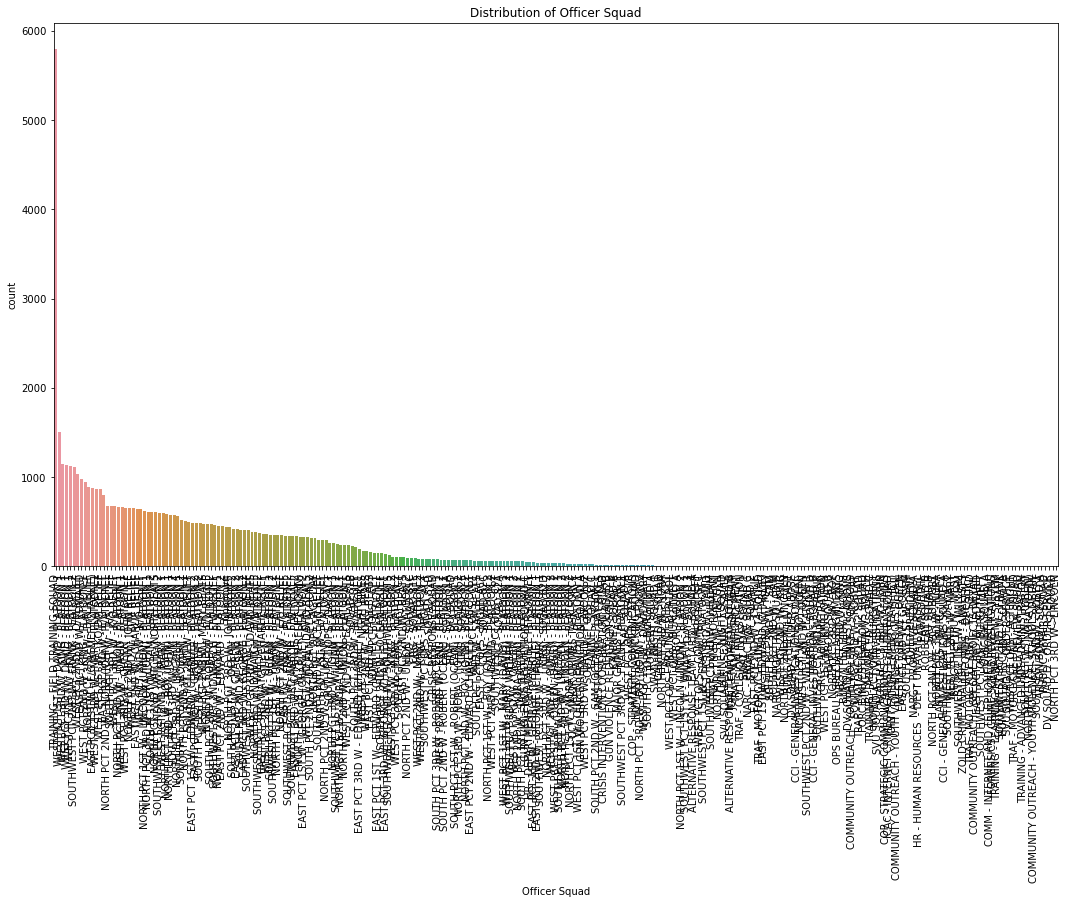

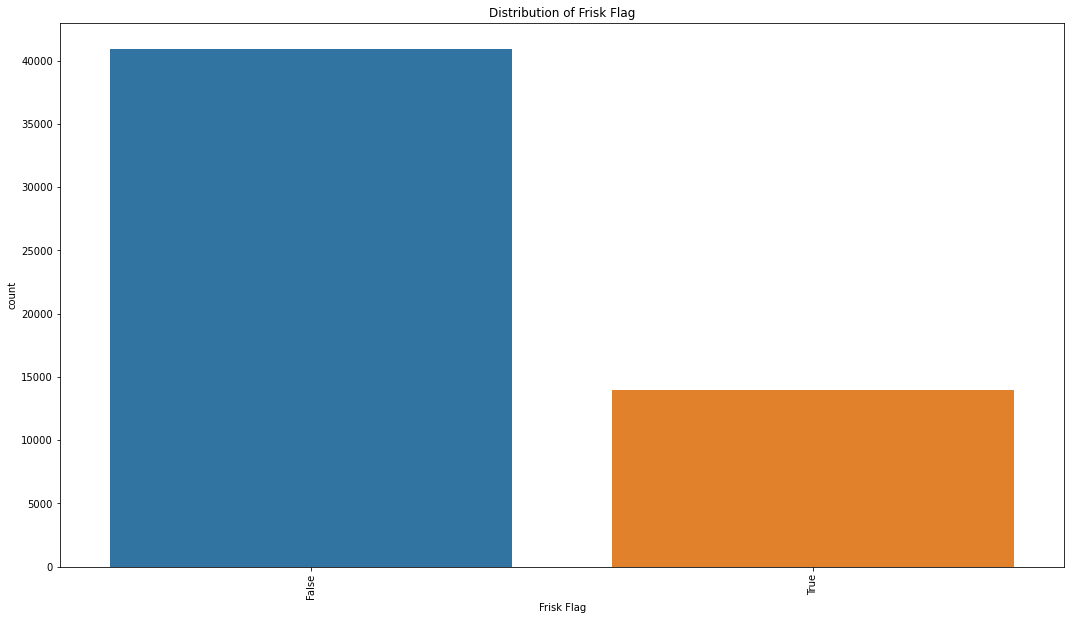

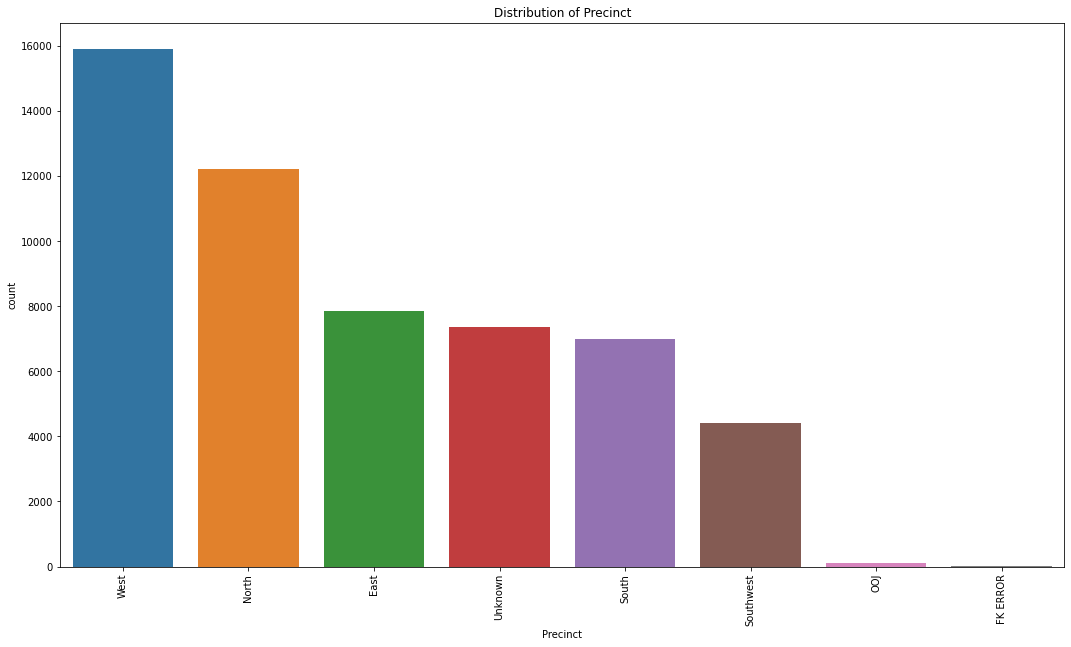

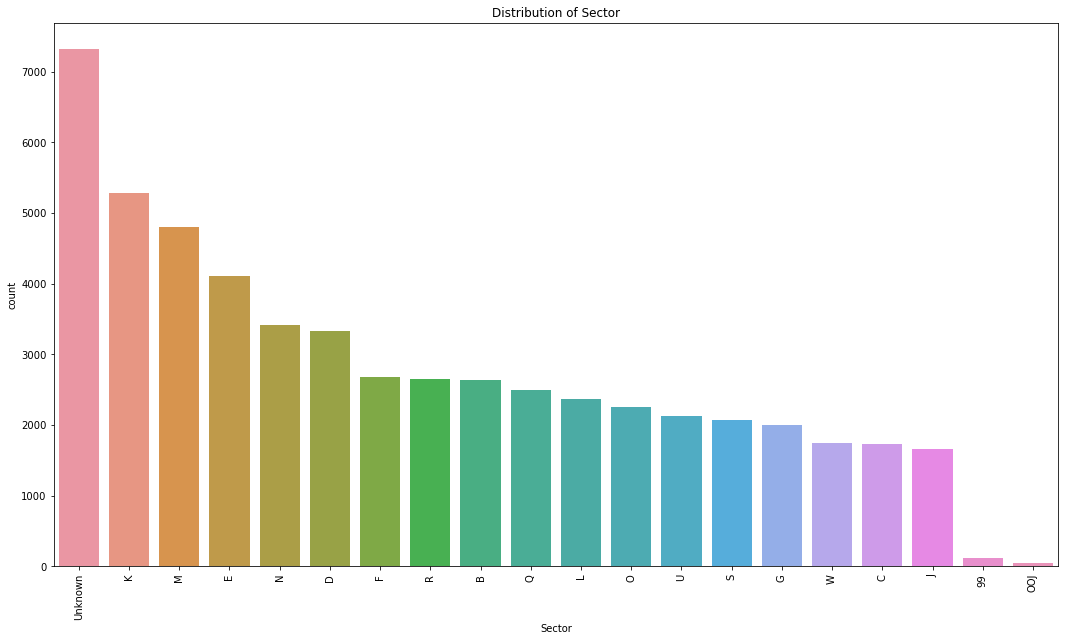

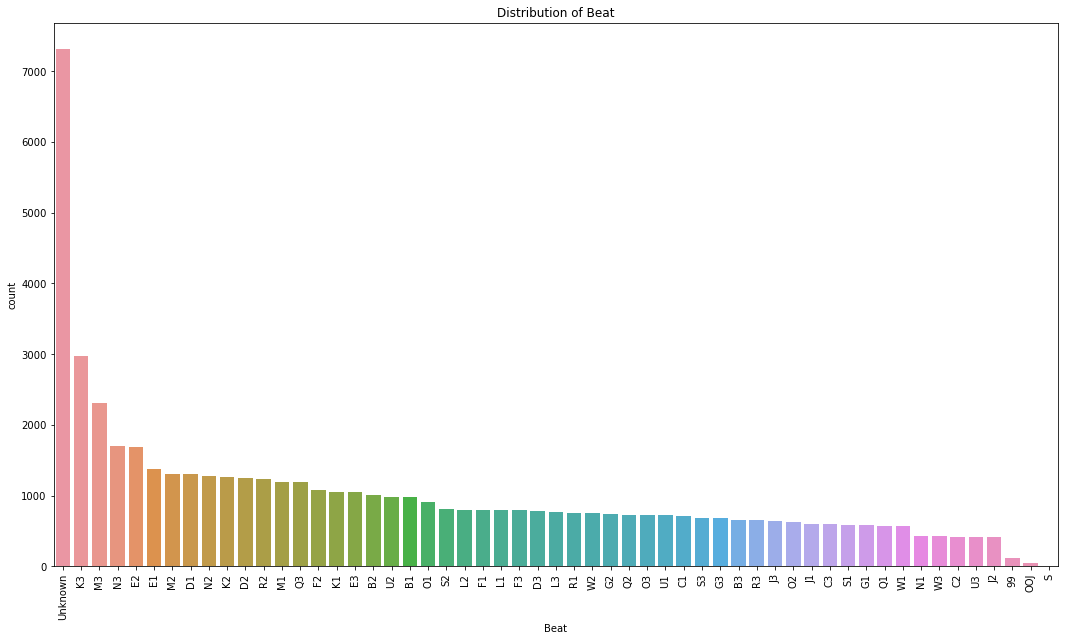

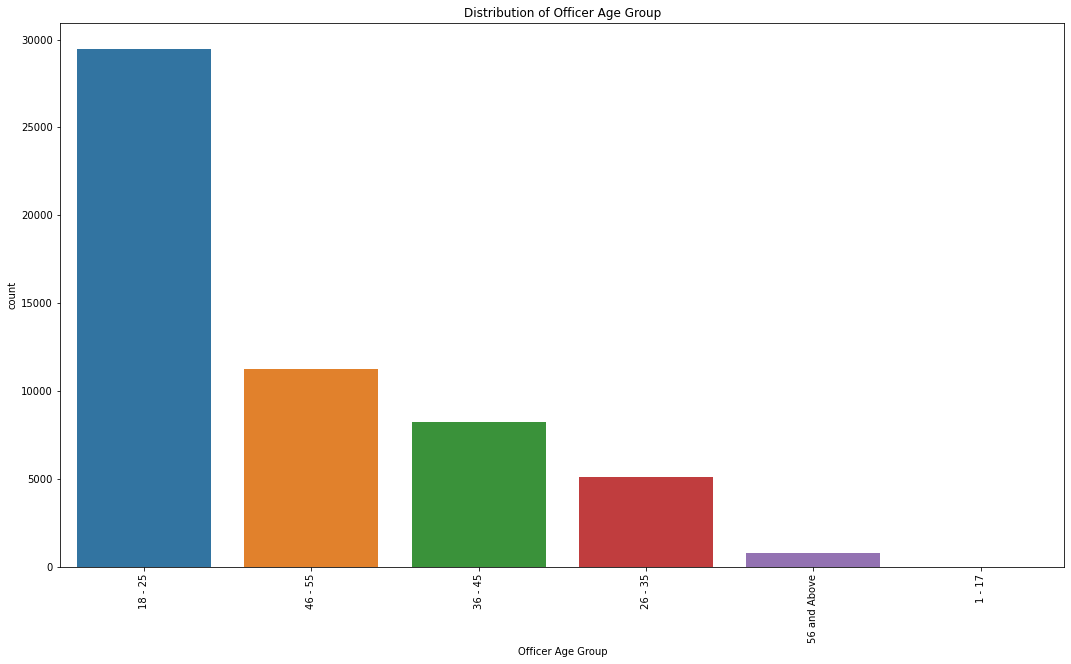

In [268]:
for column in X.columns:
    plt.figure(figsize = (18,10))
    sns.countplot(data=df_preprocessed, x=column, order=df_preprocessed[column].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {df_preprocessed[column].name}')
    plt.show;

In [251]:
print('Summary of Frequency Distribution in our Features\n')
for column in X.columns:
    print(f'{column} has {X[column].nunique()} unique values')

Summary of Frequency Distribution in our Features

Subject Age Group has 6 unique values
Stop Resolution has 5 unique values
Weapon Type has 22 unique values
Officer Gender has 2 unique values
Officer Race has 8 unique values
Subject Perceived Race has 10 unique values
Subject Perceived Gender has 6 unique values
Initial Call Type has 180 unique values
Final Call Type has 196 unique values
Call Type has 7 unique values
Officer Squad has 271 unique values
Frisk Flag has 2 unique values
Precinct has 8 unique values
Sector has 20 unique values
Beat has 55 unique values
Officer Age Group has 5 unique values


Some of our features have high cardinality as exhibited by their high frequency:

#### High Cardinality Features

1. Initial Call Type: 180 unique values
2. Final Call Type: 196 unique values
3. Officer Squad: 271 unique values
4. Beat: 55 unique values
5. Weapon Type: 22 unique value
6. Sector: 20 unique values
These features could lead to a high dimensional feature space if we apply one hot encoding (OHE) directly.


#### Low Cardinality Features
1. Subject Age Group: 6 unique values
2. Stop Resolution: 5 unique values
3. Officer Gender: 2 unique values
4. Officer Race: 8 unique values
5. Subject Perceived Race: 10 unique values
6. Subject Perceived Gender: 6 unique values
7. Call Type: 7 unique values
8. Frisk Flag: 2 unique values
9. Precinct: 8 unique values
10. Officer Age Group: 5 unique values



### Data Preparation

We will start by splitting our data into a training and test set before proceeding to avoid any data leakage

In [501]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

#### Target Encoding
We will use target encoding to deal with our high cardinality features.

Target encoding replaces each category with the mean of the target variable for that category. This reduces the dimensionality by not increasing the number of features, which can help in preventing overfitting. Example: If a category is frequently associated with positive outcomes (e.g., arrests), the encoding will reflect that association. Target encoding should not alter the shape of our data

In [502]:
from category_encoders.target_encoder import TargetEncoder

high_cardinality_cols = ['Initial Call Type', 'Final Call Type', 'Call Type', 'Officer Squad', 'Beat', 'Weapon Type','Sector']

target_encoder = TargetEncoder(cols = high_cardinality_cols)

#fit the target encoder to the high cardinality features
target_encoder.fit(X_train[high_cardinality_cols], y_train)

#transform the high cardinality features
X_train_te = target_encoder.transform(X_train[high_cardinality_cols])
X_test_te = target_encoder.transform(X_test[high_cardinality_cols])

#assign the transform values into a dataframe
X_train_te_df = pd.DataFrame(X_train_te, columns=X_train[high_cardinality_cols].columns)
X_test_te_df = pd.DataFrame(X_test_te, columns=X_test[high_cardinality_cols].columns)

#drop the original low cardinality features from our train and test set
X_train = X_train.drop(columns=high_cardinality_cols)
X_test = X_test.drop(columns=high_cardinality_cols)

# reset index of Train and Test
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

#reset index of te df
X_train_te_df = X_train_te_df.reset_index(drop=True)
X_test_te_df = X_test_te_df.reset_index(drop=True)

#update train and test feature set with the encoded values
X_train = pd.concat([X_train, X_train_te_df], axis=1)
X_test = pd.concat([X_test, X_test_te_df], axis=1)



X_train.head()

,Subject Age Group,Stop Resolution,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Frisk Flag,Precinct,Officer Age Group,Initial Call Type,Final Call Type,Call Type,Officer Squad,Beat,Weapon Type,Sector
0,26 - 35,Arrest,True,White,Unknown,Male,True,South,36 - 45,0.204152,0.093189,0.159758,0.123333,0.162857,0.111489,0.136159
1,46 - 55,Field Contact,True,White,Black or African American,Male,False,North,18 - 25,0.020547,0.020547,0.020547,0.123333,0.090767,0.111489,0.083767
2,36 - 45,Arrest,True,White,White,Male,False,Unknown,18 - 25,0.084399,0.215190,0.126020,0.121591,0.044037,0.111489,0.044001
3,46 - 55,Offense Report,True,White,Black or African American,Male,False,North,26 - 35,0.129316,0.247191,0.126020,0.057554,0.100604,0.111489,0.088740
4,26 - 35,Arrest,True,White,White,Male,True,Unknown,18 - 25,0.231481,0.163708,0.159758,0.131849,0.044037,0.428571,0.044001


In [503]:
X_test.head()

,Subject Age Group,Stop Resolution,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Frisk Flag,Precinct,Officer Age Group,Initial Call Type,Final Call Type,Call Type,Officer Squad,Beat,Weapon Type,Sector
0,18 - 25,Field Contact,True,White,Black or African American,Male,False,Unknown,46 - 55,0.020547,0.020547,0.020547,0.155280,0.044037,0.111489,0.044001
1,36 - 45,Offense Report,True,White,White,Male,False,South,46 - 55,0.096286,0.058811,0.159758,0.074534,0.144695,0.111489,0.104300
2,26 - 35,Offense Report,True,White,Asian,Male,False,East,18 - 25,0.088028,0.041856,0.100016,0.147059,0.127072,0.111489,0.127551
3,26 - 35,Arrest,True,White,Black or African American,Male,False,West,46 - 55,0.059748,0.093969,0.100016,0.073772,0.130293,0.111489,0.140967
4,56 and Above,Arrest,True,White,Black or African American,Male,False,North,18 - 25,0.101770,0.201677,0.159758,0.025397,0.044118,0.111489,0.083767


We will do some checks on our data to make sure we have preserved the integrity of our data

In [504]:
print(X_train.index[:5])
print(X_train_ohe_df.index[:5])

RangeIndex(start=0, stop=5, step=1)
RangeIndex(start=0, stop=5, step=1)


In [505]:
print(X_test.index[:5])
print(X_test_ohe_df.index[:5])

RangeIndex(start=0, stop=5, step=1)
RangeIndex(start=0, stop=5, step=1)


In [506]:
X_train.isna().sum()

Subject Age Group           0
Stop Resolution             0
Officer Gender              0
Officer Race                0
Subject Perceived Race      0
Subject Perceived Gender    0
Frisk Flag                  0
Precinct                    0
Officer Age Group           0
Initial Call Type           0
Final Call Type             0
Call Type                   0
Officer Squad               0
Beat                        0
Weapon Type                 0
Sector                      0
dtype: int64

Let's compare the shape of our encoded data with the original data.

In [507]:
print('No. of rows in encoded data:', (X_train.shape[0]+X_test.shape[0]))
print('No. of rows in original data:', (df_preprocessed.shape[0]))
print(f'No of features in encoded data {X_train.shape[1]} in Train Set and {X_test.shape[1]} in test set:')
print('No. of features in original data:', (df_preprocessed.drop('Arrest Flag', axis=1).shape[1]))

No. of rows in encoded data: 54868
No. of rows in original data: 54868
No of features in encoded data 16 in Train Set and 16 in test set:
No. of features in original data: 16


As expected, target encoding does not change the shape of our data

#### One Hot Encoding

Next, we will one hot encode our low cardinality features.Unlike with target encoding, one hot encoding will alter the shape of our data by creating additional columns for each unique value of our low cardinality features (and dropping the first column of each category since it does not add any new information that we cannot get by aggregating the rest of the columns for similar categories).

In [508]:
#select low cardinality features from our dataframe and drop the target
low_cardinality_cols = df_preprocessed.drop(columns = high_cardinality_cols +['Arrest Flag']).columns 

#fit the ohe
ohe = OneHotEncoder(handle_unknown="ignore")
ohe.fit(X_train[low_cardinality_cols])

#transform our train and test feature set
X_train_ohe = ohe.transform(X_train[low_cardinality_cols])
X_test_ohe = ohe.transform(X_test[low_cardinality_cols])   

#assign the transform values into a dataframe
X_train_ohe_df = pd.DataFrame(X_train_ohe.toarray(), columns=ohe.get_feature_names_out(X_train[low_cardinality_cols].columns))
X_test_ohe_df = pd.DataFrame(X_test_ohe.toarray(), columns=ohe.get_feature_names_out(X_test[low_cardinality_cols].columns))

#drop the original low cardinality features from our train and test set
X_train = X_train.drop(low_cardinality_cols, axis=1)
X_test = X_test.drop(low_cardinality_cols, axis=1)

# reset index of Train and Test
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

#reset index of ohe
X_train_ohe_df = X_train_ohe_df.reset_index(drop=True)
X_test_ohe_df = X_test_ohe_df.reset_index(drop=True)


#update train and test feature set with the encoded values
X_train = pd.concat([X_train, X_train_ohe_df], axis=1 )
X_test = pd.concat([X_test, X_test_ohe_df], axis=1)

X_train.head()

,Initial Call Type,Final Call Type,Call Type,Officer Squad,Beat,Weapon Type,Sector,Subject Age Group_1 - 17,Subject Age Group_18 - 25,Subject Age Group_26 - 35,...,Precinct_OOJ,Precinct_South,Precinct_Southwest,Precinct_Unknown,Precinct_West,Officer Age Group_18 - 25,Officer Age Group_26 - 35,Officer Age Group_36 - 45,Officer Age Group_46 - 55,Officer Age Group_56 and Above
0,0.204152,0.093189,0.159758,0.123333,0.162857,0.111489,0.136159,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.020547,0.020547,0.020547,0.123333,0.090767,0.111489,0.083767,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.084399,0.215190,0.126020,0.121591,0.044037,0.111489,0.044001,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.129316,0.247191,0.126020,0.057554,0.100604,0.111489,0.088740,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.231481,0.163708,0.159758,0.131849,0.044037,0.428571,0.044001,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [509]:
X_test.head()

,Initial Call Type,Final Call Type,Call Type,Officer Squad,Beat,Weapon Type,Sector,Subject Age Group_1 - 17,Subject Age Group_18 - 25,Subject Age Group_26 - 35,...,Precinct_OOJ,Precinct_South,Precinct_Southwest,Precinct_Unknown,Precinct_West,Officer Age Group_18 - 25,Officer Age Group_26 - 35,Officer Age Group_36 - 45,Officer Age Group_46 - 55,Officer Age Group_56 and Above
0,0.020547,0.020547,0.020547,0.155280,0.044037,0.111489,0.044001,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.096286,0.058811,0.159758,0.074534,0.144695,0.111489,0.104300,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.088028,0.041856,0.100016,0.147059,0.127072,0.111489,0.127551,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.059748,0.093969,0.100016,0.073772,0.130293,0.111489,0.140967,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.101770,0.201677,0.159758,0.025397,0.044118,0.111489,0.083767,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


As above, we will do some checks on our data to make sure we have preserved the integrity of our data

In [510]:
X_train.isna().sum()

Initial Call Type                                                                     0
Final Call Type                                                                       0
Call Type                                                                             0
Officer Squad                                                                         0
Beat                                                                                  0
Weapon Type                                                                           0
Sector                                                                                0
Subject Age Group_1 - 17                                                              0
Subject Age Group_18 - 25                                                             0
Subject Age Group_26 - 35                                                             0
Subject Age Group_36 - 45                                                             0
Subject Age Group_46 - 55       

In [511]:
print(X_train.index[:5])
print(X_train_ohe_df.index[:5])

RangeIndex(start=0, stop=5, step=1)
RangeIndex(start=0, stop=5, step=1)


In [512]:
print(X_test.index[:5])
print(X_test_ohe_df.index[:5])

RangeIndex(start=0, stop=5, step=1)
RangeIndex(start=0, stop=5, step=1)


In [513]:
print('No. of rows in encoded data:', (X_train.shape[0]+X_test.shape[0]))
print('No. of rows in original data:', (df_preprocessed.shape[0]))
print(f'No of features in encoded data {X_train.shape[1]} in Train Set and {X_test.shape[1]} in test set:')
print('No. of features in original data:', (df_preprocessed.drop('Arrest Flag', axis=1).shape[1]))

No. of rows in encoded data: 54868
No. of rows in original data: 54868
No of features in encoded data 57 in Train Set and 57 in test set:
No. of features in original data: 16


As expected, our rows are preserved but our encoded data now has additional columns

## Modeling

### Logistic Regression

We will start by training our model by fitting the training data to a logistic regression model. 

**1.  Model 1 with Minimal Regularization Strength**

- ***C***: This parameter controls the regularization strength. A higher C reduces the penalty on the model for large coefficients allowing to fit the data more optimally but with additional risk of overfitting.
- ***solver***: This parameter specifies the algorithm used to optimize the model. 'lbfgs' is a limited-memory solver that can be efficient for large datasets.
- ***random_state***: This parameter sets the random seed for the model, ensuring reproducibility.
- ***max_iter***: This parameter sets the maximum number of iterations for the solver.

In [514]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(C = 100, solver='lbfgs', random_state=0, max_iter=1000)


# fit the model
logreg.fit(X_train, y_train)


LogisticRegression(C=100, max_iter=1000, random_state=0)

Next, we apply the model to our test set to see its predictive performance

In [515]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([False, False, False, ..., False, False, False])

Let us to see the no. of unique values in our predictions in our target before assessing the perfomance of our model.

In [516]:
true_proportion = y_test.value_counts(normalize=True)[1] 


false_proportion = y_test.value_counts(normalize=True)[0]
print(f"True: {true_proportion:.2f}") 
print(f"False: {false_proportion:.2f}")

True: 0.12
False: 0.88


The data summary shows that the 'Arrest Flag' is imbalanced, with the 'False' class (no arrest) comprising 88% and the 'True' class (arrest) only 12% of the dataset. This means that most stops do not result in an arrest.

In [517]:
from sklearn.metrics import accuracy_score, classification_report

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
print(classification_report(y_test,y_pred_test))

Model accuracy score: 0.9213
              precision    recall  f1-score   support

       False       0.95      0.96      0.96     24185
        True       0.69      0.61      0.65      3249

    accuracy                           0.92     27434
   macro avg       0.82      0.79      0.80     27434
weighted avg       0.92      0.92      0.92     27434



In [518]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.9267
Test set score: 0.9213


In [519]:
from sklearn.metrics import roc_curve, auc

# Scikit-learn's built in roc_curve method returns the fpr, tpr, and thresholds
# for various decision boundaries given the case member probabilites

# First calculate the probability scores of each of the datapoints:
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

AUC: 0.965091830548774


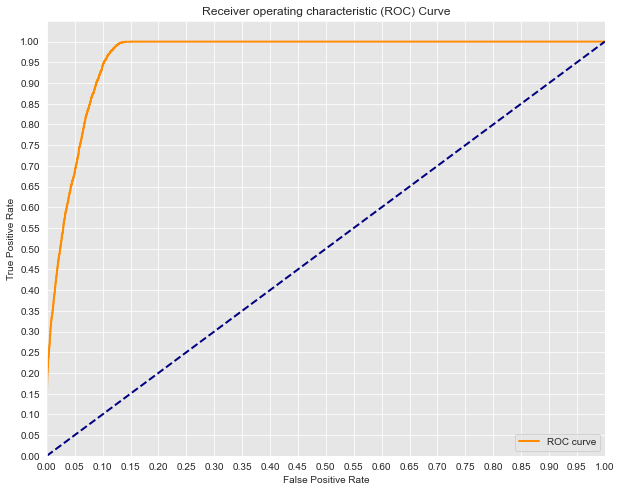

In [520]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### **Model 1 Performance Analysis** ####

****a. Overall Model Accuracy:****\
Our training set score of 92.1% and test set score of 92.7% imply that our model is highly accurate. The minimal difference between the test and training scores suggest our model generalizies well ie. not overfitting or undefitting.

****b. Classification Report:****\
Precision and Recall for the False Class: 
- Precision: 0.95
- Recall: 0.96
- F1-Score: 0.96\
These scores indicate the model performs very well in predicting the majority class (False).

Precision and Recall for the True Class:
- Precision: 0.69
- Recall: 0.61
 - F1-Score: 0.65\
This shows the model struggles to accurately predict the minority class (True), missing 39% of the actual positives.

****c. ROC Curve:****\
The ROC curve shows a high True Positive Rate (TPR) or Sensitivity against a low False Positive Rate (FPR) across the threshold range, indicating strong performance in distinguishing between the classes.The curve is close to the top-left corner, which represents excellent performance.

****Implications of Class Imbalance:****
- Biased Model Predictions: The imbalance can cause our model to be biased towards predicting the majority class ('False' for no arrest) because predicting the majority class more frequently would still yield a high accuracy.In law enforcement, accurately predicting the 'Arrest Flag' is crucial. Misclassifying an actual arrest situation (False Negative) could have serious implications, such as failing to appropriately flag an encounter where an arrest should occur.


- Underperformance on Minority Class: As seen in the classification report, the precision and recall for the 'True' class (arrest) are significantly lower than for the 'False' class. This suggests that the model struggles to correctly identify and predict arrests, which is the minority class. Overpredicting 'False' (no arrest) could lead to missed opportunities for intervention, which might not align with the goals of public safety and proper law enforcement.

****Using SMOTE to Address Class Imbalance****

SMOTE (Synthetic Minority Oversampling) generates new sample data using'synthetic'data from our original dataset. 



Original class distribution: 

False    24179
True      3255
Name: Arrest Flag, dtype: int64
-----------------------------------------
True     24179
False    24179
Name: Arrest Flag, dtype: int64
AUC for 0.25: 0.964887674285111
-------------------------------------------------------------------------------------
AUC for 0.5: 0.964394693286139
-------------------------------------------------------------------------------------
AUC for 0.75: 0.9644093922316899
-------------------------------------------------------------------------------------
AUC for 1.0: 0.9642564213870803
-------------------------------------------------------------------------------------


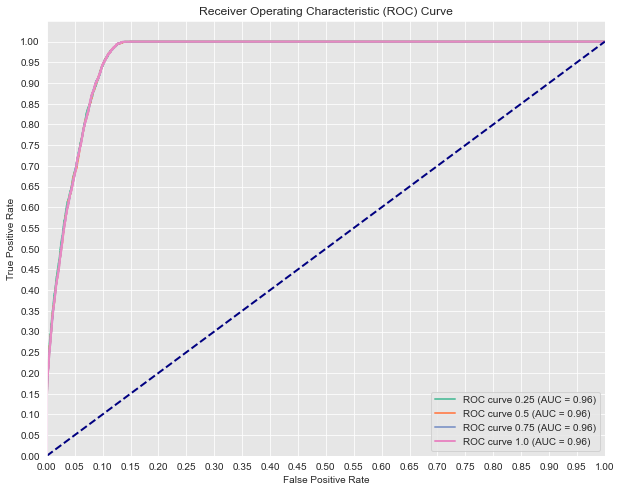

In [524]:
print('Original class distribution: \n')
print(y_train.value_counts())

# Initialize SMOTE and resample the data
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Preview synthetic sample class distribution
print('-----------------------------------------')
print(pd.Series(y_train_resampled).value_counts())

# Now let's compare a few different ratios of minority class to majority class
ratios = [0.25, 0.5, 0.75, 1.0]
names = ['0.25', '0.5', '0.75', '1.0']  # Ensure the length of 'names' matches 'ratios'
colors = sns.color_palette('Set2')

plt.figure(figsize=(10, 8))

for n, ratio in enumerate(ratios):
    # Fit a model using different SMOTE ratios
    smote = SMOTE(sampling_strategy=ratio)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    logreg = LogisticRegression(fit_intercept=False, C=100, solver='lbfgs', max_iter = 100_000)
    model_log = logreg.fit(X_train_resampled, y_train_resampled)

    # Predict on the test set
    y_hat_test = logreg.predict(X_test)
    y_score = logreg.decision_function(X_test)

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    auc_score = auc(fpr, tpr)

    # Print the AUC for the current ratio
    print(f'AUC for {names[n]}: {auc_score}')
    print('-------------------------------------------------------------------------------------')

    # Plot the ROC curve
    lw = 2
    plt.plot(fpr, tpr, color=colors[n], lw=lw, label=f'ROC curve {names[n]} (AUC = {auc_score:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [522]:
# Create the classifier, fit it on the training data and make predictions on the test set
from sklearn import tree
clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [523]:
y_preds = clf.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_preds))

Accuracy:  0.9169643508055697
